In [1]:
%matplotlib inline

In [2]:
import matplotlib as mpl
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.offsetbox import AnchoredText
import numpy as np
import pandas as pd
mpl.rcParams['mathtext.fontset'] = 'custom'
mpl.rcParams['mathtext.rm'] = 'Bitstream Vera Sans'
mpl.rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'
mpl.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'

In [5]:
INFILE_EL = '/home/shivesh/Documents/physics/PhD/beamtest/DDC2/pingu/latest/processed/l1/0624/1GeV_e.hd5'
INFILE_PI = '/home/shivesh/Documents/physics/PhD/beamtest/DDC2/pingu/latest/processed/l1/0620/8GeV_pion.hd5'

In [6]:
el_store = pd.HDFStore(INFILE_EL)
el_df = el_store['df']
el_store.close()

In [5]:
pi_store = pd.HDFStore(INFILE_PI)
pi_df = pi_store['df']
pi_store.close()
print pi_df

    isamp   adc     timestamp  index  voltage     charge
0       0    -4  1.498011e+09      0    -0.88  18.141408
1       4    -1  1.498011e+09      0    -0.22  18.141408
2       8     0  1.498011e+09      0     0.00  18.141408
3      12    -2  1.498011e+09      0    -0.44  18.141408
4      16    -2  1.498011e+09      0    -0.44  18.141408
5      20    -3  1.498011e+09      0    -0.66  18.141408
6      24    -2  1.498011e+09      0    -0.44  18.141408
7      28     0  1.498011e+09      0     0.00  18.141408
8      32     0  1.498011e+09      0     0.00  18.141408
9      36    -1  1.498011e+09      0    -0.22  18.141408
10     40     0  1.498011e+09      0     0.00  18.141408
11     44    28  1.498011e+09      0     6.16  18.141408
12     48   382  1.498011e+09      0    84.04  18.141408
13     52   913  1.498011e+09      0   200.86  18.141408
14     56  1180  1.498011e+09      0   259.60  18.141408
15     60  1221  1.498011e+09      0   268.62  18.141408
16     64  1203  1.498011e+09  

In [6]:
CHARGE_BINS = 16
el_charges = el_df['charge'].unique()
pi_charges = pi_df['charge'].unique()
c_max = np.max([np.max(el_charges), np.max(pi_charges)])
charge_binning = np.linspace(0, c_max, CHARGE_BINS+1)

In [7]:
el_split_charge = []
pi_split_charge = []
for ch_idx in xrange(CHARGE_BINS):
    el_split_charge.append(el_df[(el_df['charge'] > charge_binning[ch_idx]) & \
                                 (el_df['charge'] < charge_binning[ch_idx+1])])
    pi_split_charge.append(pi_df[(pi_df['charge'] > charge_binning[ch_idx]) & \
                                 (pi_df['charge'] < charge_binning[ch_idx+1])])

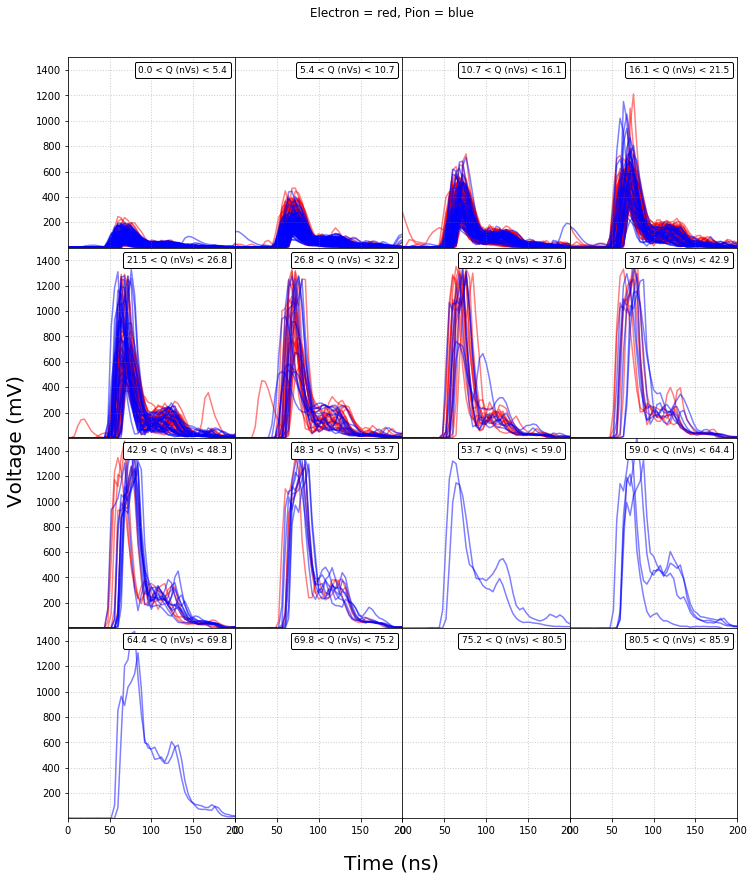

In [9]:
DIMS = (4, 4)

fig = plt.figure(figsize=[12, 14])
fig.suptitle(r'Electron = red, Pion = blue', y=0.93)
gs = gridspec.GridSpec(*DIMS)
gs.update(hspace=0., wspace=0.)
for ch_idx in xrange(CHARGE_BINS):
    #gs0 = gridspec.GridSpecFromSubplotSpec(
    #    1, 1, subplot_spec=gs[ch_idx], wspace=0, hspace=0, width_ratios=[1,1]
    #)
    ax0 = fig.add_subplot(gs[ch_idx])
    
    el_waveforms = el_split_charge[ch_idx]
    pi_waveforms = pi_split_charge[ch_idx]
    el_idx = el_waveforms['index'].unique()
    pi_idx = pi_waveforms['index'].unique()
    
    for idx in el_idx:
        wv_df = el_waveforms[el_waveforms['index'] == idx]
        isamp, voltage = np.array(wv_df['isamp']), np.array(wv_df['voltage'])
        #ax0.scatter(isamp, voltage, marker='o', color='red')
        ax0.plot(isamp, voltage, color='red', alpha=0.5)
    for idx in pi_idx:
        wv_df = pi_waveforms[pi_waveforms['index'] == idx]
        isamp, voltage = np.array(wv_df['isamp']), np.array(wv_df['voltage'])
        #ax0.scatter(isamp, voltage, marker='o', color='blue')
        ax0.plot(isamp, voltage, color='blue', alpha=0.5)
    
    ax0.set_xlim(0, 200)
    ax0.set_ylim(0, 1500)
    
    for xmaj in ax0.xaxis.get_majorticklocs():
        ax0.axvline(x=xmaj, ls=':', color='gray', alpha=0.4, linewidth=1)
    if ch_idx < CHARGE_BINS - DIMS[1]:
        ax0.get_xaxis().set_ticks([])
    xticks = ax0.yaxis.get_major_ticks()
    xticks[0].set_visible(False)
        
    for ymaj in ax0.yaxis.get_majorticklocs():
        ax0.axhline(y=ymaj, ls=':', color='gray', alpha=0.4, linewidth=1)
    yticks = ax0.yaxis.get_major_ticks()
    yticks[0].set_visible(False)
    if ch_idx % DIMS[1] != 0:
        ax0.get_yaxis().set_ticks([])
    
    at = AnchoredText(r'{0:.1f} < Q (nVs) < {1:.1f}'.format(charge_binning[ch_idx], charge_binning[ch_idx+1]),
                      prop=dict(size=9), frameon=True, loc=1)
    at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
    ax0.add_artist(at)

fig.text(0.055, 0.5, r'Voltage (mV)', rotation='vertical', va='center', size=20)
fig.text(0.5, 0.075, r'Time (ns)', ha='center', size=20)
fig.savefig('./images/q_overlay.png')